<a href="https://colab.research.google.com/github/pfjapena/Integracion-01-2025-/blob/main/1_Caracterizaci%C3%B3n_VA_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Caracterización Experimental de Variables**
0. Cargar las librerias de trabajo

In [1]:
import numpy as np                #Funciones Numéricos
import matplotlib.pyplot as plt
import pandas as pd               #Comunicación Excel
import seaborn as sns             #Libreria para la gráfica de distribuciones

#Para carga automática de los datos
from google.colab import drive    #Cargar datos desde el drive automática
drive.mount('/content/drive')     #conecta el drive al colab

Mounted at /content/drive


1. Se procede con la carga de los datos

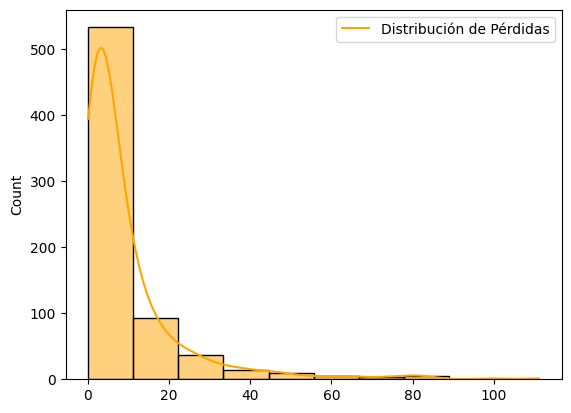

In [2]:
nxl='/content/drive/MyDrive/2. IntegraciónDatos(01-2025)/3. FallasTecnologicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.dropna()
XDB.head(10)  #Mostrar los primeros 100 datos

#Tomamos las variables de interés
Xev=XDB.iloc[:,3]  #Variable Eventos Semanales
Xsev=XDB.iloc[:,4] #Pérdidas Promedio por Evento
LDA=np.multiply(Xev,Xsev)

#Gráficamos la Distribución de las Pérdidas
plt.figure()
sns.histplot(LDA,kde=True,bins=10, color='orange')
#bins: Agrupar los datos en 10 intervalos
plt.legend(['Distribución de Pérdidas'])
plt.show()


2. Caracterización de la Distribución de las Pérdidas

In [10]:
counts,bin_edges=np.histogram(LDA,bins=10)
print("Los datos por intervalo son:\n",counts)       #Cuantos datos hay por intervalo
print("Los limites de los intervalos son:\n",bin_edges)    #Limites de los Intervalos

#1. Los valores centrales - marcas de clase
mc=(bin_edges[:-1]+bin_edges[1:])/2
#Limites inferiores bin_edges[:-1]
#limites Superiors bin_edges[1:]
print("Los valores centrales de las clases son:\n",mc)

#Cuantos datos hay por intervalo
fp=counts/sum(counts)
print("Los datos por intervalo son:\n",fp)

#2. Se procede con el calculo de las medidas de tendencia central
#Media, Varianza, Coeficiente de Asimetría, Kurtosis
u=np.sum(np.multiply(mc,fp))
print("La media de los datos es:",u)

#3. Desviación - Estándar (Varianza)
var=np.sum(np.multiply((mc-u)**2,fp))  #Suma producto del Excel
print("La varianza de los datos es:",var)
std=np.sqrt(var)
print("La desviación estándar de los datos es:",std)

#4. Coeficiente de asimetría
cas=np.sum(np.multiply(((mc-u)/std)**3,fp))
print("El coeficiente de asimetría de los datos es:",cas)

#5. Coeficiente de Kurtosis
ck=np.sum(np.multiply(((mc-u)/std)**4,fp))
ck=ck-3
print("El coeficiente de kurtosis de los datos es:",ck)

Los datos por intervalo son:
 [533  93  37  14   9   5   3   5   1   1]
Los limites de los intervalos son:
 [  0.1423   11.23637  22.33044  33.42451  44.51858  55.61265  66.70672
  77.80079  88.89486  99.98893 111.083  ]
Los valores centrales de las clases son:
 [  5.689335  16.783405  27.877475  38.971545  50.065615  61.159685
  72.253755  83.347825  94.441895 105.535965]
Los datos por intervalo son:
 [0.76034237 0.13266762 0.05278174 0.01997147 0.0128388  0.00713267
 0.0042796  0.00713267 0.00142653 0.00142653]
La media de los datos es: 11.07019634094151
La varianza de los datos es: 170.14888945066892
La desviación estándar de los datos es: 13.044113210589247
El coeficiente de asimetría de los datos es: 3.58241551867726
El coeficiente de kurtosis de los datos es: 15.266617247076208


**Análisis de Resultados**
En la base de datos se cuenta con un total de 701 registros de eventos de pérdida asociados con las operaciones a través de canales electrónicos de una FINTECH. Estos registros nos arrojan como resultado una confiabilidad en la estimación de los estadísticos del 99% de acuerdo con la teoría de los percentiles. En la gráfica anterior podemos observar que la distribución presenta estructura de cola larga, esto promovido por un coeficiente de asimetría positivo aproximadamente de 3.348, y un coeficiente de curtosis aproximadamente de 15 unidades, lo que indica que la mayoría de los datos se encuentran muy concentrados alrededor de la media, en un 76% aproximadamente. Esta estructura muestra claramente que los eventos de pérdida extremos son muy escasos, lo que indica un baja exposición al riesgo.

3. Se procede con el muestreo de la variable aleatoria de pérdidas

El coeficiente de asimetría de los datos es: [3.39128413]
El coeficiente de kurtosis de los datos es: [11.86542507]
Variación coeficiente de asimetría de los datos es: [0.05335266]
Variación coeficiente de kurtosis de los datos es: [0.22278624]


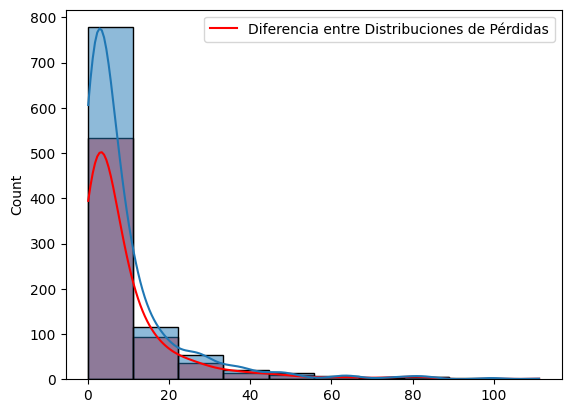

In [15]:
from scipy.stats import skew,kurtosis
#0. Preparar la variable para el muestreo
LDAdf=pd.DataFrame(LDA)

#1. Se procede con el muestreo - se va a repetir número de los 349
LDAs=LDAdf.sample(n=1000,replace=True)
casd=skew(LDAs)
print("El coeficiente de asimetría de los datos es:",casd)

ckd=kurtosis(LDAs)
ckd=ckd-3
print("El coeficiente de kurtosis de los datos es:",ckd)

pvcas=(cas-casd)/cas
print("Variación coeficiente de asimetría de los datos es:",pvcas)

pvkd=(ck-ckd)/ck
print("Variación coeficiente de kurtosis de los datos es:",pvkd)

#Se procede con la gráfica de las perdidas
plt.figure()
sns.histplot(LDA,kde=True,bins=10, color='red')
sns.histplot(LDAs,kde=True,bins=10, color='green')
plt.legend(['Diferencia entre Distribuciones de Pérdidas'])
plt.show()


4. Mapeo de la Distribución de Probablidad

In [19]:
if abs(cas)<0.5 and abs(ck)<0.5:
  print("Posible distribución Normal")
elif cas>0 and ck>3:
  if ck>=8:
    print("Posible Distribución Exponencial")
  elif ck>=6:
    print("Posible Distribución Gamma")
  else:
    print("Posible Distribución Weibull")

elif cas<0 and ck<3:
  print("Posible Distribución Beta")
elif ck<3:
  print("Posible Distribución Uniforme")
else:
  print("No se pudo identificar la distribución")

Posible Distribución Exponencial


** Análisis de Resultados **
El número de datos disponibles para este análisis fueron en total 701 datos lo que lo úbica en una confiabilidad del 99%. Para incrementar esta confiabilidad se procedio con un muestreo basado en el método de montecarlo (Giro de la Ruleta - Cargada) logrando en muchos casos coeficientes de curtosis y coeficientes de asimetría por debajo del 5% y coeficiente de curtosis del 15%, a diferencia del método sampling que utiliza la librería pandas los cuales tuvieron variaciones mayores a estos porcentajes.El método de montercalo asegura variaciones mucho más bajas en estos coeficientes.